# Classification with a perceptron

This notebook illustrates the classification of dots in a plane, separated by a line.

The perceptron is coded in Keras.

## Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns; sns.set()

import tensorflow as tf
from tensorflow import keras

## Create sample and test datasets

We create data with the random functions from numpy. On the plot below, the small dots are the data used for training (whote = 0; black = 1); the big dots are the data used for testing the model at the end (blue = 0; green = 1).

We want to sort the dots according to their features (0 or 1).

Note that there are some uncertainty (or outliers).

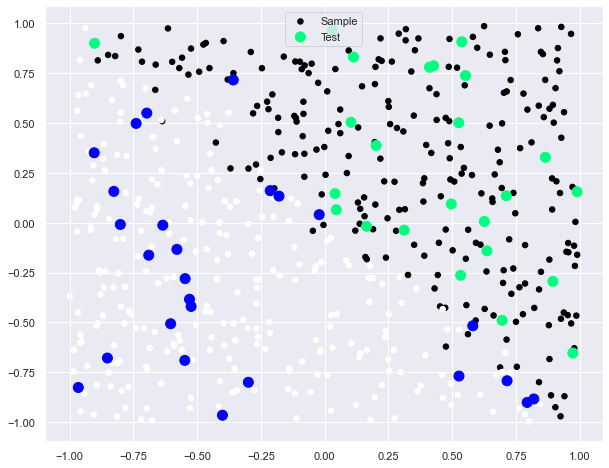

In [51]:
m, p, sig = -1, 0, 0.1
N, Ntest = 500, 50
X1, X1test = np.random.random(N)*2-1, np.random.random(Ntest)*2-1
X2, X2test = np.random.random(N)*2-1, np.random.random(Ntest)*2-1
Y, Ytest = np.where(X2-m*X1-p>sig * np.random.randn(N), 1, 0), np.where(X2test-m*X1test-p>sig * np.random.randn(Ntest), 1, 0)
X, Xtest = np.transpose(np.stack((X1, X2))), np.transpose(np.stack((X1test, X2test)))

plt.figure(figsize=(10,8))
plt.scatter(X1, X2, c=Y, s = 30, cmap = 'binary', label="Sample")
plt.scatter(X1test, X2test, c=Ytest, s = 100, cmap = 'winter', label="Test")
plt.legend()

## Perceptron with Keras

### Create model

We create a perceptron with Keras. It is a sequential model with 1 layer with (here) 2 output variables and 3 trainable parameters (2 weights and bias).

The activation function is a sigmoid, the loss function is binary cross-entropy (a standard for binary classification), the validation metric is accuracy.

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


### Split sample into training and validation dataset

We split the data available for training into training and validation datasets.

In [33]:
Nval = 50
Ntrain = N - Nval
permut = np.random.permutation(range(N))
ival, itrain = permut[:Nval], permut[Nval:]
Xval, Yval = X[ival], Y[ival]
Xtrain, Ytrain = X[itrain], Y[itrain]

# The following lines are not necessary for fitting. 
#Xval = np.expand_dims(Xval,1)
#Yval = np.expand_dims(Yval,1)
#Xtrain = np.expand_dims(Xtrain,1)
#Ytrain = np.expand_dims(Ytrain,1)

### Train model

In [53]:
model.fit(Xtrain, Ytrain, \
          epochs = 500,
          verbose = 0,
          validation_data = (Xval, Yval))

### Prediction with test dataset

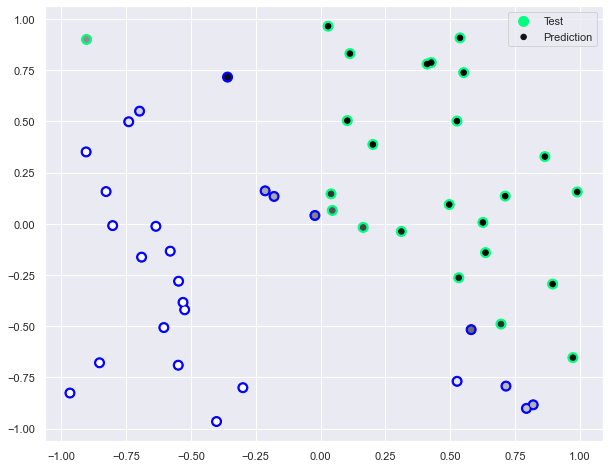

In [54]:
Ypred = model(Xtest)

plt.figure(figsize=(10,8))
plt.scatter(X1test, X2test, c=Ytest, s = 100, cmap = 'winter', label="Test")
plt.scatter(X1test, X2test, c=Ypred, s = 30, cmap = 'binary', label="Prediction")
#plt.plot(Xtest, Ytest, 'ro', markersize=4, label="Test")
plt.legend()